# Εργασία Αριθμητικής Ανάλυσης

Χατζηγρίβας Κωνσταντίνος 10552
Λιούτας Γιώργος          10974

## Συλλογή Δεδομένων

In [23]:
import yfinance as yfin

stock = yfin.Ticker("MSFT")
history = stock.history(start = "2025-05-12", end = "2025-05-17", interval="30m")
history['Open'].to_csv('open_prices.csv', header=True)

print(history['Open'].head())

Datetime
2025-05-12 09:30:00-04:00    445.899994
2025-05-12 10:00:00-04:00    441.095001
2025-05-12 10:30:00-04:00    443.940002
2025-05-12 11:00:00-04:00    443.875000
2025-05-12 11:30:00-04:00    443.760010
Name: Open, dtype: float64


## Πολυωνυμική Προσαρμογή Ελαχίστων Τετραγώνων

In [24]:
import numpy as np

def get_poly(x, y, degree):
	coeffs = np.polyfit(x, y, degree)
	poly = np.poly1d(coeffs)
	return poly

data = history['Open'].values
data_x = np.arange(len(data))

split_index = int(len(data_x) * 0.8)
data_x_train = data_x[:split_index]
data_x_test = data_x[split_index:]
data_train = data[:split_index]
data_test = data[split_index:]

poly1=get_poly(data_x_train, data_train, 1)
poly2=get_poly(data_x_train, data_train, 2)
poly3=get_poly(data_x_train, data_train, 3)

MAE1=0.0
MAE2=0.0
MAE3=0.0
MSE1=0.0
MSE2 =0.0
MSE3=0.0

for i in range(0, len(data_x_test)):
	MAE1 += np.abs(poly1(data_x_test[i]) - data_test[i])
	MAE2 += np.abs(poly2(data_x_test[i]) - data_test[i])
	MAE3 += np.abs(poly3(data_x_test[i]) - data_test[i])
	MSE1 += (poly1(data_x_test[i]) - data_test[i])**2
	MSE2 += (poly2(data_x_test[i]) - data_test[i])**2
	MSE3 += (poly3(data_x_test[i]) - data_test[i])**2

MAE1 /= len(data_test)
MAE2 /= len(data_test)
MAE3 /= len(data_test)
MSE1 /= len(data_test)
MSE2 /= len(data_test)
MSE3 /= len(data_test)

print(f"1ou bathmou: MAE:{MAE1:.4f}, MSE:{MSE1:.4f}")
print(f"2ou bathmou: MAE:{MAE2:.4f}, MSE:{MSE2:.4f}")
print(f"3ou bathmou: MAE:{MAE3:.4f}, MSE:{MSE3:.4f}")


1ou bathmou: MAE:5.8970, MSE:35.7621
2ou bathmou: MAE:3.8092, MSE:15.8579
3ou bathmou: MAE:2.9545, MSE:10.7534


Άρα το καλύτερο μοντέλο είναι αυτό του χ βαθμού, και αυτό θα χρησιμοποιούμε από εδώ και πέρα.

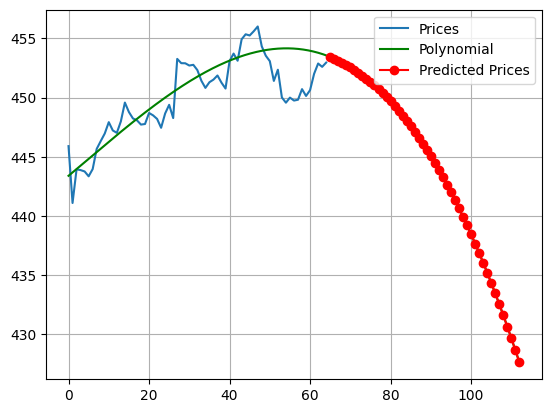

In [25]:
import matplotlib.pyplot as plot

x_pred = np.arange(len(data_x), len(data_x) + 48)
y_pred = poly3(x_pred)

x_new = np.linspace(0, len(data_x) + 48 - 1, 1000)
y_new = poly3(x_new)

plot.plot(data_x, data, label="Prices")
plot.plot(x_new, y_new, label="Polynomial", color='green')
plot.plot(x_pred, y_pred, label="Predicted Prices", color='red', marker='o')
plot.legend()
plot.grid(True)
plot.show()

In [30]:
def trap_area(y, h = 1):
	area = 0
	for i in range(len(y) - 1):
		area += (y[i] + y[i + 1]) * h / 2
	return area

def simp_area(y):
	n = len(y)

	s = y[0] + y[n - 1]

	for i in range(1, n - 1):
		if i % 2 == 0:
			s += 2 * y[i]
		else:
			s += 4 * y[i]

	area = (1 / 3) * s
	return area

def get_area(poly, step, start, stop):
	x = np.linspace(start, stop, step)
	y = poly(x)
	h = (stop - start) / (step - 1)
	a = trap_area(y, h)
	a /= (stop - start)
	return a

a_simp = simp_area(data)
a_trap = trap_area(data)
m_simp = a_simp / len(data)
m_trap = a_trap / len(data)

print(f"Trapezoid: Area:{a_trap} Mean:{m_trap}")
print(f"Simpson: Area:{a_simp} Mean:{m_simp}")
print()
print(f"Degree 1 Area:{get_area(poly1, 100, 0, len(data))}")
print(f"Degree 2 Area:{get_area(poly2, 100, 0, len(data))}")
print(f"Degree 3 Area:{get_area(poly3, 100, 0, len(data))}")

Trapezoid: Area:28803.621704101562 Mean:443.1326416015625
Simpson: Area:28802.332010904945 Mean:443.1128001677684

Degree 1 Area:451.33605839851356
Degree 2 Area:450.9014250467642
Degree 3 Area:450.7154333891032


In [ ]:
def aitken(x, y, val):
	arr = []
	for i in range(len(x)):
		for j in range(len(x)):
			arr[i][j] = 0
		arr[i][0] = y[i]
	
	for j in range(1, len(x)):
		for i in range(j, len(x)):
			Arr[i][j] = ((x[j - 1] - val) * Arr[i][j - 1] - (x[i] - val) * Arr[j - 1][j - 1]) / (x[j - 1] - x[i])
	
	return Arr[len(x) - 1][len(x) - 1]

def n_divided(x, coef, val):
	arr = []
	for i in range(len(x)):
		for j in range(len(x)):
			arr[i][j] = 0
		arr[i][0] = y[i]

	for j in range(1, len(x)):
		for i in range(len(x) - j):
			arr[i][j] = (arr[i+1][j-1]-arr[i][j-1]) / (x[i+j]-x[i])
	
	coef = []
	for i in range(len(x)):
		coef.append(arr[0][i])

	r = coef[0]
	p = 1.0
	for i in range(1, len(coef)):
		p *= (val - x[i - 1])
		r += coeffs[i] * p
	return r